# Linear Discriminant Analysis

## Dimensionality Reduction
* Dimensionality Reduction refers to reducing the number of attributes used for analysis
* Example:
    - Iris data, reducing the 4D data to 3, 2 maybe even 1D

## Methods for Dimensionality Reduction
* Feature Selection
    - Selecting a few from the existing features
    - Forward Selection (start with none, select each features and)
    - Backward Selection (start with all, reduce one at a time and)
* Feature Extraction
    - Extract fewer features as transformation/combination of existing features
* Focus on feature extraction methods
    - We will see what guides these combinations

## Feature Extraction
* The idea is to obtain the new features from the combination of existing features
* Linear combination of attributes
    - PCA
    - LDA
* Non-linear combination of attributes
    - Kernel PCA
* We will see how to choose the right combinations (projections or transformations)

#### Combinations are chosen based on 
* Goals of dimensionality reductions
    - preserve as much information as possible
    - preserve class separability/ class discrimination
* the data available

## Linear Transformation based-Techniques
* Unsupervised learning framework (labels not available):<br> The goal is to find the combinations of the variables that reduce the dimensionality and preserve the variance in the data (PCA)
* Supervised learning framework (label are available):<br> The goal is to find combinations of the variables that reduce the dimensionality and preserve class separability (LDA)

## Linear Discriminant Analysis
* It is a supervised framework
* features along with labels are available
* Find the lower dimensional hyperplane, which preserves the *maximum class discriminatory information* in the data
* Project the data onto the hyperplane
---
<img src='lda1.png'>

## Visual Representation of the objective
* Assume we have 2 features and 2 classes
* Then the objective of LDA can be pictorially represented as:
---
<img src='lda4.webp'>

---
<img src='lda3.png'>

## Intuition
* Goal: Project the data into lower dimensional hyperplane ($\le C-1$) dimension which preserves maximum class discriminatory information in the data
    - Here $C$ is the number of categories or types of classes in the output variable $Y$
    - *eg* For Iris data, the maximum dimension of lower dimensional hyperplane the data can be projected onto is a 3
    
- What is the metric for class discriminatory information?
    1. Within class scatter matrix
    2. Between class scatter matrix
    
* Given the data, how does one calculate the within-class and between-class scatter matrices?

## Difference between LDA and PCA: visual
* The objective of LDA is to perform dimensionality reduction
* While we can also achieve this via PCA, we wish to preserve as much of the *class discriminatory information* as possible, and this is where LDA will be chosen over PCA
---
<img src='ldavpca.png'>

## LDA with two classes
* Assume we have m-dimensional samples $\{x_1,x_2,\dots,x_N\}$,$N_1$ of which belong to $C_1$ and $N_2$ belong to $C_2$
- We seek to obtain a row vector $\mathbf{Y}$ by projecting the samples of $\mathbf{X}$ onto a line ($\mathbb{R}^{C-1}$ space, $C=2$)
* Of all the possible lines we would like to select the one that maximizes the separability of the scalars of different classes
- In order to find a good projection vector, we need to define a measure of separation between the projections

* The mean vector of each class in $\mathbf{X}$ and $\mathbf{Y}$ feature space is:

$\mu_i=\frac{1}{N_i}\Sigma_{x\in\omega_i}x$

and

$\tilde{\mu_i}=\frac{1}{N_i}\Sigma_{y\in\omega_i}y=\frac{1}{N_i}\Sigma_{x\in\omega_i}w^Tx$

$\tilde{\mu_i}=w^T\frac{1}{N_i}\Sigma_{x\in\omega_i}x=w^T\mu_i$

* Here, 
    * $\mu_i$ is the mean of class $\omega_i$,
    * $\tilde{\mu_i}$ is the mean of the class $\omega_i$ in the transformed space $\mathbf{Y}$
    * $w^T$ is the transformation matrix
    * $N_i$ is the number of datapoints in class $\omega_i$

- i.e. projecting $\mathbf{X}$ to $\mathbf{Y}$ will lead to projecting the mean of $\mathbf{X}$ to the mean of $\mathbf{Y}$
* We could then choose the distance between the projected means as our objective function:
<p style='text-align:center;'>$J(w)=\lvert\tilde{\mu_1}-\tilde{\mu_2}\rvert$</p>

<p style='text-align:center;'>$J(w)=\lvert w^T\mu_1-w^T\mu_2\rvert$</p>

<p style='text-align:center;'>$J(w)=\lvert w^T(\mu_1-\mu_2)\rvert$</p>

* The solution proposed by Fisher is to *maximize a function that represents the difference between the means, normalized by a measure of the within class variability* or the so-called *scatter*
- For each class we define the *scatter*, an equivalent of the variance, as the sum of squared differences between the projected samples and their class mean.

<p style='text-align:center;'>$\tilde{s}_i^2=\Sigma_{y\in \omega_i}(y-\tilde{\mu_i})^2$</p>

* $\tilde{s}_i^2$ measures the variability within class $\omega_i$ after projecting it on the $\mathbf{Y}$-space
- Thus $\tilde{s}_1^2+\tilde{s}_2^2$ measures the variability within the two classes at hand after projection, hence it is called the *within-class scatter* of the projected samples
---
* The Fischer linear discriminant is defined as the linear function $w^Tx$ that maximizes the criterion function (the distance between the projected means normalized by the within class scatter of the projected samples.

<p style='text-align:center;'>$J(w)=\frac{\lvert\tilde{\mu_1}-\tilde{\mu_2}\rvert^2}{\tilde{s}_1^2+\tilde{s}_2^2}$</p>

- Therefore, we will be looking for a projection where datapoints from the same class are projected very close to each other and at the same time, the projected means are as far apart as possible
---

* In order to find the optimum projection $w*$, we need to express $J(w)$ as an explicit function of $w$.
- We will define a measure of the scatter in multivariate feature space $\mathbf{X}$ which are denoted as scatter matrices

<p style='text-align:center;'>$S_i = \Sigma_{x\in\omega_i}(x-\mu_i)(x-\mu_i)^T$</p>

<p style='text-align:center;'>$S_W = S_1+S_2$</p>

- where $S_i$ is the *covariance matrix of class $\omega_i$* and $S_W$ is called the *within-class scatter matrix*

* Now, the scatter of the projection $\mathbf{Y}$ can then be expressed as a function of the scatter matrix in feature space $\mathbf{X}$

$\tilde{s}_i^2 = \Sigma_{y\in\omega_i}(y-\tilde{\mu_i})^2=\Sigma_{x\in\omega_i}(w^Tx-w^T\mu_i)^2$

$=\Sigma_{x\in\omega_i}w^T(x-\mu_i)(x-\mu_i)^Tw$

$=w^T[\Sigma_{x\in\omega_i}(x-\mu_i)(x-\mu_i)^T]w=w^TS_iw$

$\tilde{s}_1^2+\tilde{s}_2^2 = w^TS_1w+w^TS_2w = w^T(S_1+S_2)w=w^TS_Ww=\tilde{S}_W$

- Here, $\tilde{S}_W$ is the within-class scatter matrix of the datapoints projected onto $\mathbf{Y}$
---

* Similarly, the difference between the projected means (in $\mathbf{Y}$ space) can be expressed in terms of the means in the original feature space ($\mathbf{X}$ space)

$(\tilde{\mu_1}-\tilde{\mu_2})^2=(w^T\mu_1-w^T\mu_2)^2$

$\hspace{41pt}=w^T(\mu_1-\mu_2)(\mu_1-\mu_2)^Tw$

$\hspace{41pt}=w^TS_Bw=\tilde{S_B}$

* The matrix $S_B$ is called the *between-class scatter* of the original samples/feature vectors, while $\tilde{S_B}$ is the *between-class scatter of the projected samples*, in the $\mathbf{Y}$ space
- Since  $S_B$ is the outer product of two vectors, its rank is at most one
---

* We can finally express the Fischer Criterion in terms of $S_W$ and $S_B$ as:

<p style='text-align:center;'>$J(w)=\frac{\lvert\tilde{\mu_1}-\tilde{\mu_2}\rvert^2}{\tilde{s}_1^2+\tilde{s}_2^2}=\frac{w^TS_bw}{w^TS_Ww}=\frac{\tilde{S}_B}{\tilde{S}_W}$</p>

* Hence $J(w)$ is a measure of the difference between class means (encoded in the between-class scatter matrix) normalized by a measure of the within class scatter matrix


### optimizing to find the maximum of $J(w)$
* To find the maximum of $J(w)$, we differentiate and equate to zero.

$\frac{d}{dw}J(w) = \frac{d}{dw}\frac{w^TS_Bw}{w^TS_ww}=0$

$(w^TS_Ww)\frac{d}{dw}(w^TS_Bw)-(w^TS_Bw)\frac{d}{dw}(w^TS_Ww)=0$

$(w^TS_Ww)2S_Bw-(w^TS_Bw)2S_Ww=0$

- dividing by $2w^TS_Ww$

$\frac{w^TS_Ww}{w^TS_Ww}S_Bw-\frac{w^TS_Bw}{w^TS_Ww}S_Ww=0$

$S_Bw-J(w)S_Ww=0$

$S_W^{-1}S_Bw-J(w)w=0\hspace{10pt}$ This can be solved through eigendecomposition

## solving the generalized eigenvalue problem

$S_W^{-1}S_Bw = Aw\hspace{10pt}$ where $A=J(w)$, a scalar

* This yields:

$w* = arg\:\max_{w} J(w) = arg\:\max_{w} \frac{w^TS_Bw}{w^TS_Ww}=S_W^{-1}(\mu_1-\mu_2)$

* This is known as Fischer's Linear Discriminant, although it's not a discriminant but rather a specific choice of direction for the projection of the data down to one dimension (eigenvector)

- Using the same notation as PCA, the solution will be the eigenvector(s) of $S_X = S_W^{-1}S_B$

### an example
* Compute the linear Discriminant projection for the following two dimensional dataset
    - samples for class $\omega_1$:$\mathbf{X_1} = (x_1,x_2)=\{(4,2),(2,4),(2,3),(3,6),(4,4)\}$
    - samples for class $\omega_2$:$\mathbf{X_2} = (x_1,x_2)=\{(9,10),(6,8),(9,5),(8,7),(10,8)\}$

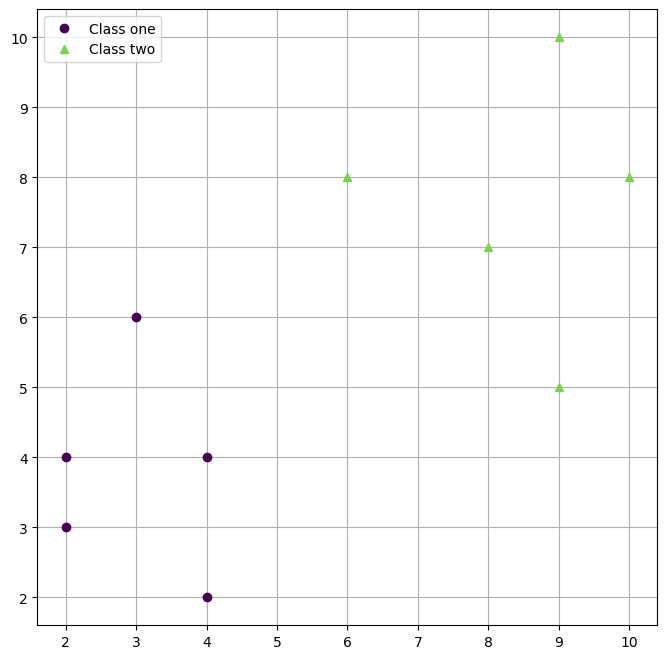

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

cmap = mpl.colormaps['viridis'](np.linspace(0,.8,2))
# creating the datapoints for the two classes
om1 = np.array([[4,2],[2,4],[2,3],[3,6],[4,4]])
om2 = np.array([[9,10],[6,8],[9,5],[8,7],[10,8]])

#plotting the points in the X space
plt.subplots(figsize=(8,8))
plt.plot(om1[:,0],om1[:,1],ls='',c=cmap[0],marker='o',label='Class one')
plt.plot(om2[:,0],om2[:,1],ls='',c=cmap[1],marker='^',label='Class two')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# finding the means of the datapoints
mean1 = np.mean(om1,axis=0)
mean2 = np.mean(om2,axis=0)

#finding the covariances
cov1 = np.cov(om1.T)
cov2 = np.cov(om2.T)

print(mean1,mean2,cov1,cov2,sep='\n')

[3.  3.8]
[8.4 7.6]
[[ 1.   -0.25]
 [-0.25  2.2 ]]
[[ 2.3  -0.05]
 [-0.05  3.3 ]]


In [67]:
# finding S_W
Sw= cov1+cov2
print(Sw)

[[ 3.3 -0.3]
 [-0.3  5.5]]


In [68]:
# finding S_B
Sb = (mean1-mean2).reshape(2,1)@(mean1-mean2).reshape(1,2)
print(Sb)

[[29.16 20.52]
 [20.52 14.44]]


In [69]:
# using eigendecomposition on S_W^{-1}S_B
ev, evecs = np.linalg.eig(np.linalg.inv(Sw)@Sb)
print(f'The eigenvalues are {ev[1]:.1f} and {ev[0]:.2f}')

# therefore the eigenvalue and the eigenvector we pick are:
print(f'the chosen eigenvalue is {ev[0]:.3f} and its corresponding eigenvector {evecs[:,0]}')

The eigenvalues are 0.0 and 12.20
the chosen eigenvalue is 12.201 and its corresponding eigenvector [0.90878558 0.41726342]


* We will always pick the largest eigenvalue and its corresponding eigenvector as it corresponds to the largest possible value of $J(w)$

**NOTE** Here, $J(w)$ is the actual eigenvalue, and we wish to maximize it 

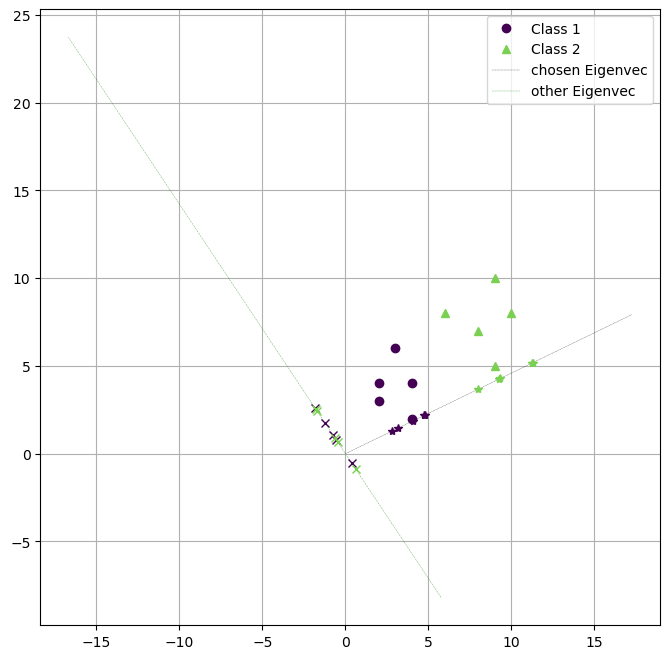

In [71]:
#plotting the points and the eigenvectors

plt.subplots(figsize=(8,8))
plt.plot(om1[:,0],om1[:,1],ls='',c=cmap[0],marker=marks[0],label='Class 1')
plt.plot(om2[:,0],om2[:,1],ls='',c=cmap[1],marker=marks[1],label='Class 2')

plt.plot(np.arange(0,20)*evecs[0][0],np.arange(0,20)*evecs[1][0],ls='--',lw=.2,c='k',label='chosen Eigenvec')
plt.plot(np.arange(-10,30)*evecs[0][1],np.arange(-10,30)*evecs[1][1],ls='-.',lw=.2,c='g',label='other Eigenvec')

#plotting the projected points
tom1 = om1@evecs
tom2 = om2@evecs

#good separability
plt.plot(tom1[:,0]*evecs[0,0],tom1[:,0]*evecs[1,0],ls='',c=cmap[0],marker='*')
plt.plot(tom2[:,0]*evecs[0,0],tom2[:,0]*evecs[1,0],ls='',c=cmap[1],marker='*')

#poor separability
plt.plot(tom1[:,1]*evecs[0,1],tom1[:,1]*evecs[1,1],ls='',c=cmap[0],marker='x')
plt.plot(tom2[:,1]*evecs[0,1],tom2[:,1]*evecs[1,1],ls='',c=cmap[1],marker='x')

plt.legend()
plt.grid(True)
plt.show()

## LDA for $C$ classes
* Now we have $C$-classes instead of just two
- We are now seeking $(C-1)$ projections $[\mathbf{Y}_1,\mathbf{Y}_2,\dots,\mathbf{Y}_{C-1}]$ by means of $(C-1)$ projection vectors $w_i$
* $w_i$ can be arranged by *columns* into a projection matrix $\mathbf{W}=[w_1,w_2,\dots,w_{C-1}]$ such that

$\mathbf{Y}_i = w_i^Tx \rightarrow \mathbf{Y}=\mathbf{W}^Tx$

- where
    * $x$ is an $M\times 1$ column vector,
    * $\mathbf{Y}$ is a $C-1\times 1$ column vector,
    * $\mathbf{W}$ is a $M\times C-1$ matrix
    
 ---
 * Recall the two classes case, the within-class scatter was computed as: $S_W=S_1+S_2$
 - This can be generalized in the $C$-class case as:
 
 $S_W = \Sigma_{i=1}^{C}S_i$
 
* where $S_i=\Sigma_{x\in\omega_i}(x-\mu_i)(x-\mu_i)^T$
* and $\mu_i=\frac{1}{N_i}\Sigma_{x\in omega_i}x$

---
* Recall the two classes case, the between-class scatter was computed as:

$S_B =(\mu_1-\mu_2)(\mu_1-\mu_2)^T$

- For $C$-classes, we will measure the between-class scatter with respect to the mean of all classes as follows:

$S_B = \Sigma_{i=1}^{C}N_i(\mu_i-\mu)(\mu_i-\mu)^T$

* where
    - $\mu=\frac{1}{N}\Sigma_{\forall x}x=\frac{1}{N}\Sigma_{\forall x}N_i\mu_i$
    - $\mu_i =\frac{1}{N_i}\Sigma_{x\in\omega_i}x$
    
---
* Similarly we can define the mean vectors for the projected samples $\mathbf{Y}$ as:

$\tilde{\mu}_i=\frac{1}{N}\Sigma_{y\in\omega_i}y$ 

and 

$\tilde{\mu} = \frac{1}{N}\Sigma_{\forall y}y$

- While the scatter matrices for the projected samples $\mathbf{Y}$ will be:

$\tilde{S}_W = \Sigma_{i=1}^C\tilde{S}_i=\Sigma_{i=1}^C\Sigma_{y\in\omega_i}(y-\tilde{\mu_i})(y-\tilde{\mu_i})^T$


$\tilde{S}_B = \Sigma_{i=1}^CN_i(\tilde{\mu_i}-\tilde{\mu})(\tilde{\mu_i}-\tilde{\mu})^T$

---
* Recall that in the case of two classes, we have expressed the scatter matrices of the projected samples in terms of those of the original samples as:

$\tilde{S}_W=\mathbf{W}^TS_W\mathbf{W}$

$\tilde{S}_B=\mathbf{W}^TS_B\mathbf{W}$ This still holds in the case of $C$ classes

- REcall that we are looking for a projection that maximized the ratio of between-class to within-class scatter.

* Since the projection is no longer a scalar (it has $C-1$ dimensions), we then use the determinant of the scatter matrices to obtain a scalar objective function:

$J(\mathbf{W})=\frac{|\tilde{S}_B|}{|\tilde{S}_W|}=\frac{|\mathbf{W}^TS_B\mathbf{W}|}{|\mathbf{W}^TS_W\mathbf{W}|}$

- And we will seek the projection $\mathbf{W}*$ that maximizes this ratio

---
* To find the maximum of $J(\mathbf{W})$, we differentiate wrt $\mathbf{W}$ and equate to zero
- Recall in the scenario of two classes, we solve the eigen value problem

$S_W^{-1}S_Bw=Aw$ where $A=J(w)$, which is a scalar

* For $C$-classes, we have $C-1$ projection vector, hence the eigen-value problem can be generalized to the $C$-classes case as:

$S_W^{-1}S_Bw_i=Aw_i$ where $A=J(w_i)$, which is a scalar and $i\in[1,2,\dots,C-1]$

- Thus, it can be shown that the optimal projection matrix $\mathbf{W}*$ is the one whose columns are the eigenvectors corresponding to the largest eigenvalues of the following generalized eigenvalue problem:

$S_W^{-1}S_B\mathbf{W}=A\mathbf{W}$ where $A=J(\mathbf{W})$, which is a scalar and $\mathbf{W}$ is a matrix of column eigenvectors


## Limitaitons of LDA
* LDA produces at most $C-1$ feature projections
    - If the classification error estimates establish that more features are needed, some other method must be employed to provide those additional features
    
* LDA will fail when the discriminatory information is not in the mean but rather in variance of the data
---
<img src='ldalim.jpg'>

# Summary
* Compute the N-dimensional mean vectors for the different classes from the dataset
- Compute the scatter matrices (in-between class and within-class scatter matrix)
* Compute the eigenvectors ($e_1,e_2,\dots,e_N)$ and corresponding eigenvalues $(\lambda_1,\lambda_2,\dots,\lambda_N)$ for the scatter matrices
- Sort the eigenvectors by decreasing eigenvalues and choose $k$ eigenvectors with the largest eigenvalues to form a $N\times k$ dimensional matrix $\mathbf{W}$ (where every column represents an eigenvector)
* Use this $N\times k$ eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication $Z = X\times \mathbf{W}$ where $X$ is a $(M\times N)$ dimensional matrix representing the $M$ samples, and $Z$ are the transformed $M\times k$ dimensional samples in the new subspace

### Exercise for the 3-class problem

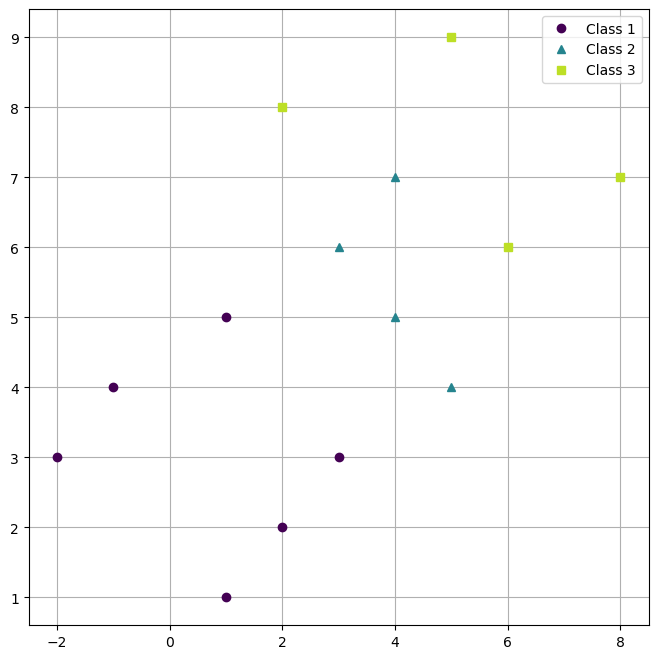

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#defining the colormap
cmap = mpl.colormaps['viridis'](np.linspace(0,.9,3))
marks = ['o','^','s']

#defining the data
om1 = np.array([[1,1],[2,2],[3,3],[-2,3],[-1,4],[1,5]])
om2 = np.array([[5,4],[4,5],[3,6],[4,7]])
om3 = np.array([[6,6],[8,7],[2,8],[5,9]])

#plotting the data
plt.subplots(figsize=(8,8))

plt.plot(om1[:,0],om1[:,1],ls='',c=cmap[0],marker=marks[0],label='Class 1')
plt.plot(om2[:,0],om2[:,1],ls='',c=cmap[1],marker=marks[1],label='Class 2')
plt.plot(om3[:,0],om3[:,1],ls='',c=cmap[2],marker=marks[2],label='Class 3')

plt.grid()
plt.legend()
plt.show()

In [74]:
# calculating means and intra-class covariance
mean1 = np.mean(om1,axis=0)
mean2 = np.mean(om2,axis=0)
mean3 = np.mean(om3,axis=0)
mean = (mean1*6+mean2*4+mean3*4)/14

cov1 = np.cov(om1.T)
cov2 = np.cov(om2.T)
cov3 = np.cov(om3.T)

In [75]:
# calculating S_W and S_B
Sw = cov1+cov2+cov3

Sb = 0
for clas in [om1,om2,om3]:
    Sb+=clas.shape[0]*(np.mean(clas,axis=0)-mean).reshape(2,1)@(np.mean(clas,axis=0)-mean).reshape(2,1).T
    
print(Sw,Sb,sep='\n')

[[10.38333333 -2.76666667]
 [-2.76666667  5.33333333]]
[[56.8452381 52.5      ]
 [52.5       50.       ]]


In [76]:
# calcualting the eigendecomposition
ev,evec = np.linalg.eig(np.linalg.inv(Sw)@Sb)

print(f'The Largest eigenvalue is {ev[1]} and the corresosponding C-1 or 1 eigenvectors are: {evec[:,1]}')

The Largest eigenvalue is 23.241050678620784 and the corresosponding C-1 or 1 eigenvectors are: [-0.53494255 -0.84488844]


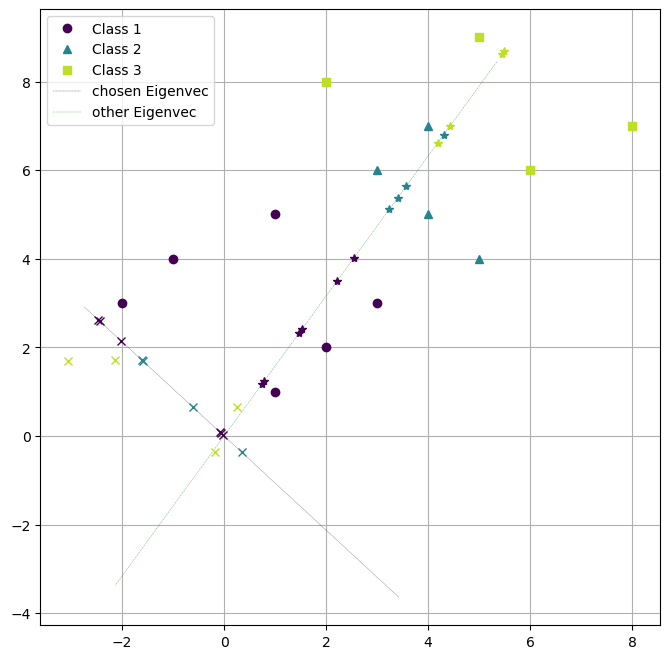

In [82]:
#plotting the points and the eigenvectors

plt.subplots(figsize=(8,8))
plt.plot(om1[:,0],om1[:,1],ls='',c=cmap[0],marker=marks[0],label='Class 1')
plt.plot(om2[:,0],om2[:,1],ls='',c=cmap[1],marker=marks[1],label='Class 2')
plt.plot(om3[:,0],om3[:,1],ls='',c=cmap[2],marker=marks[2],label='Class 3')

plt.plot(np.arange(-5,5)*evec[0][0],np.arange(-5,5)*evec[1][0],ls='--',lw=.2,c='k',label='chosen Eigenvec')
plt.plot(np.arange(-10,5)*evec[0][1],np.arange(-10,5)*evec[1][1],ls='-.',lw=.2,c='g',label='other Eigenvec')

#plotting the projected points
tom1 = om1@evec
tom2 = om2@evec
tom3 = om3@evec

#poor separability
plt.plot(tom1[:,0]*evec[0,0],tom1[:,0]*evec[1,0],ls='',c=cmap[0],marker='x')
plt.plot(tom2[:,0]*evec[0,0],tom2[:,0]*evec[1,0],ls='',c=cmap[1],marker='x')
plt.plot(tom3[:,0]*evec[0,0],tom2[:,0]*evec[1,0],ls='',c=cmap[2],marker='x')

#good separability
plt.plot(tom1[:,1]*evec[0,1],tom1[:,1]*evec[1,1],ls='',c=cmap[0],marker='*')
plt.plot(tom2[:,1]*evec[0,1],tom2[:,1]*evec[1,1],ls='',c=cmap[1],marker='*')
plt.plot(tom3[:,1]*evec[0,1],tom3[:,1]*evec[1,1],ls='',c=cmap[2],marker='*')

plt.legend()
plt.grid(True)
plt.show()